# PRiAD 2022/23 sprawdzian nr 3

Test obejmuje materiał z ćwiczenia PRiAD6, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń (w szczególności z uczenia nienadzorowanego). 

**Imię, nazwisko i numer indeksu:** (Barbara, Gąsiewska, 319039)

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime 
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

pd.options.display.float_format = "{:.2f}".format 


def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    # wyswietla liste obrazow kolorowych lub s skali szarosci
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()


def lut_arytm(ile,mnoznik):
    lut = np.empty((256), np.uint8)
    for i in range(256):
         lut[i] = np.clip(i*mnoznik + ile, 0, 255) 
    return lut

---

> **Zadanie 1** Wczytaj obraz wskazany przez prowadzącego. Wykonaj etykietowanie obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Wyświetl w dowolny sposób obraz zawierający etykiety. Napisz kod umożliwiający policzenie wszystkich obiektów na obrazie i wyświetl wyznaczoną w ten sporó liczbe obiektów.

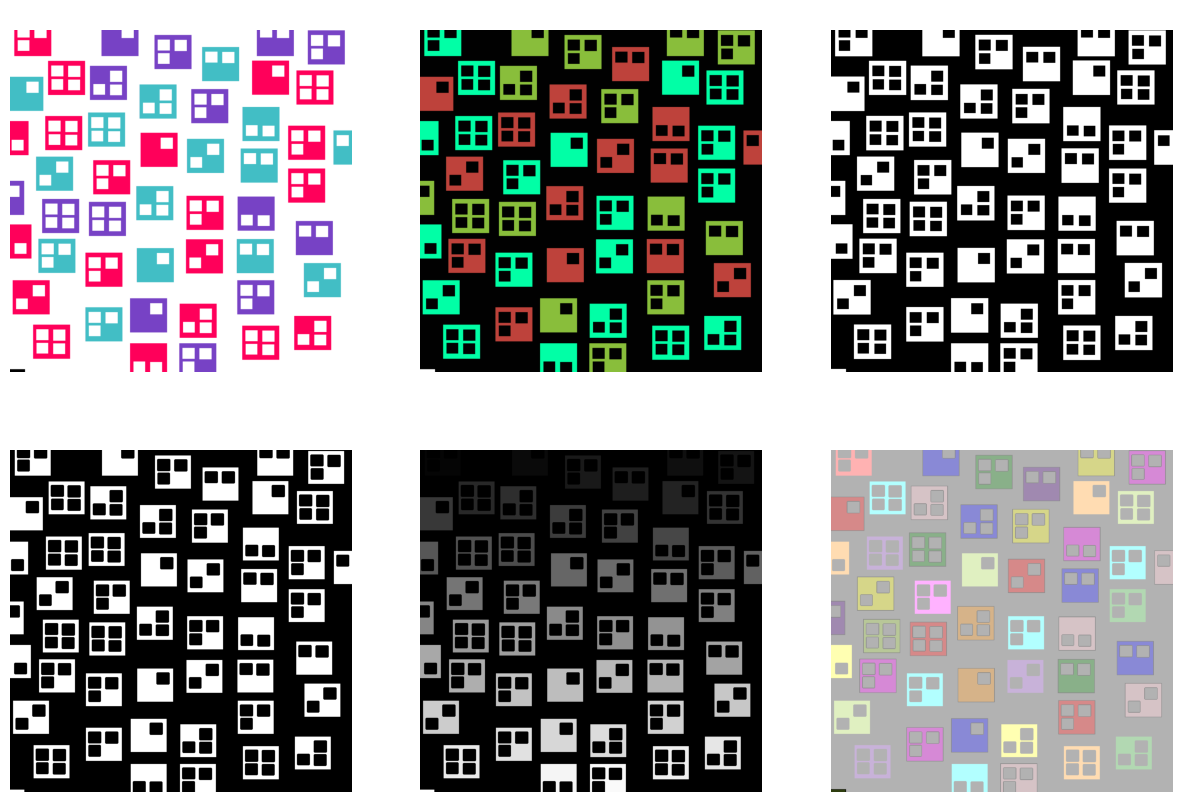

Ilość obiektów to: 50


In [2]:
obraz = io.imread('PRiADspr3_C.png')

ile = 256
mnoznik = -1
l1 = lut_arytm(ile,mnoznik)[obraz]

bin = l1[:,:,1]>1
zamkniecie = simo.erosion(bin,simo.disk(2))
etykiety = sime.label(zamkniecie)

pliob([obraz,l1,bin,zamkniecie, etykiety, sic.label2rgb(etykiety, image=obraz, bg_label=0)],3)
cechy = sime.regionprops(etykiety)

print("Ilość obiektów to:", len(cechy))

> **Zadanie 2** Dobierz cechy umożliwiające rozróżnienie wskazanych przez prowadzącego kategorii obiektów. Wyodrębnij do odrębnych obrazów obiekty z poszczególnych kategorii.

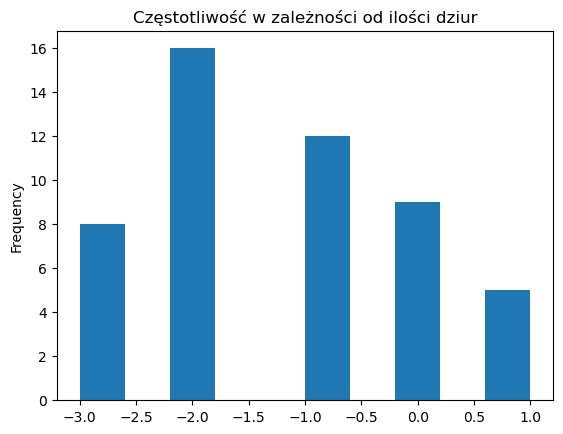

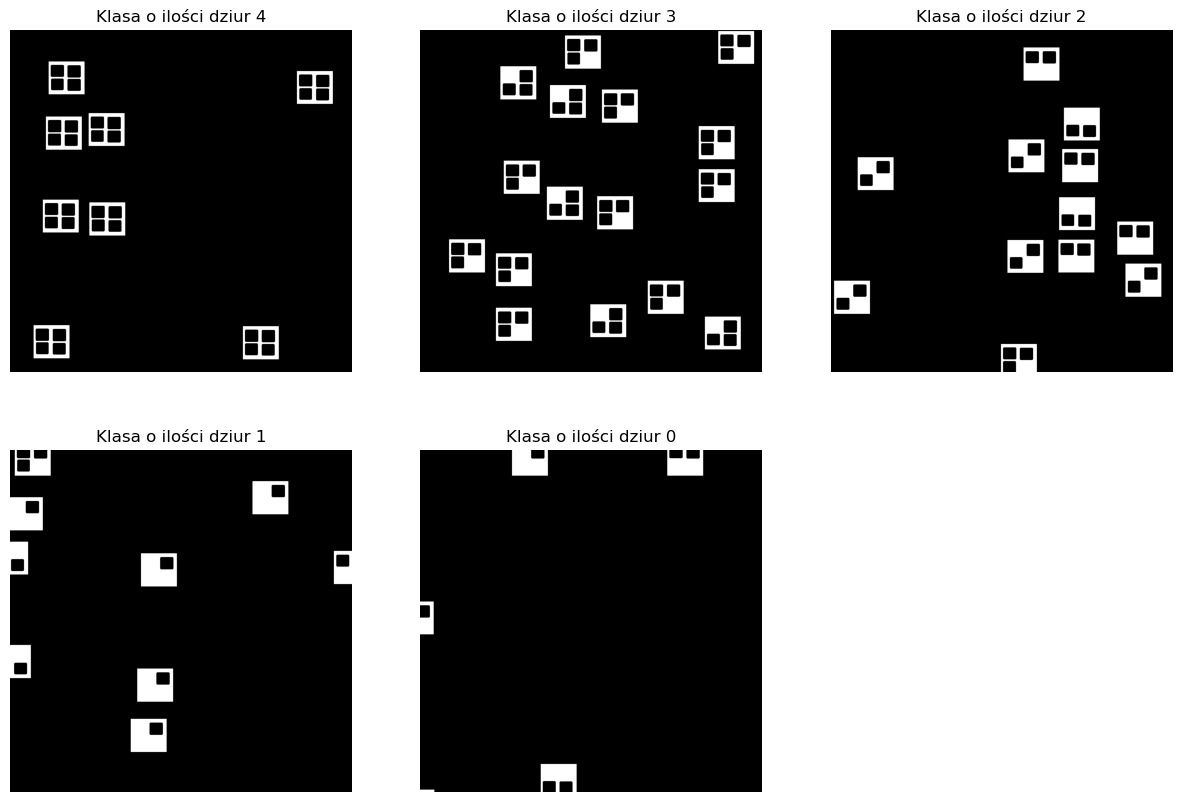

In [19]:
ile_obiektow = len(cechy)
lista_cech = ['EulerNumber']
ile_cech = len(lista_cech)
tabela_cech = np.zeros((ile_obiektow ,ile_cech))

for i in range(0,ile_obiektow):
    for j in range(0,ile_cech):
      tabela_cech[i,j] = cechy[i][lista_cech[j]]


data = pd.DataFrame(tabela_cech[:,-1])
data.plot.hist(bins = 10, legend = None, title="Częstotliwość w zależności od ilości dziur")


lio = []
lin = []
progDol = [-3.1,-2.5,-1.5, -0.5, 0.5]
progGora = [-2.5,-1.5,-0.5, 0.5, 1.1]

ilosc_klas = 5

for i in range(ilosc_klas):
    lio.append(np.where(np.isin(etykiety,np.where((tabela_cech[:,-1]>=progDol[i]) & (tabela_cech[:,-1]<=progGora[i]))+ np.array(1)),255,0))
    lin.append('Klasa o ilości dziur ' + str(4 - i))
pliob(lio,  3, lin) 

> **Zadanie 3** Napisz kod zliczający obiekty w każdej kategorii

In [16]:
for i in range(ilosc_klas):
    arr, = np.where((tabela_cech[:,-1]>=progDol[i]) & (tabela_cech[:,-1]<=progGora[i]))
    print("Klasa o ilości dziur", ilosc_klas -1 - i, ":", len(arr))

Klasa o ilości dziur 4 : 8
Klasa o ilości dziur 3 : 16
Klasa o ilości dziur 2 : 12
Klasa o ilości dziur 1 : 9
Klasa o ilości dziur 0 : 5


> **Zadanie 4** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiADspr3_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.